In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## Part 1

results from combined dataset, for 3 categories and binary classification, the result is from "Qitta_multi.py"-->"multi_3204535.out"

Histogram of the response

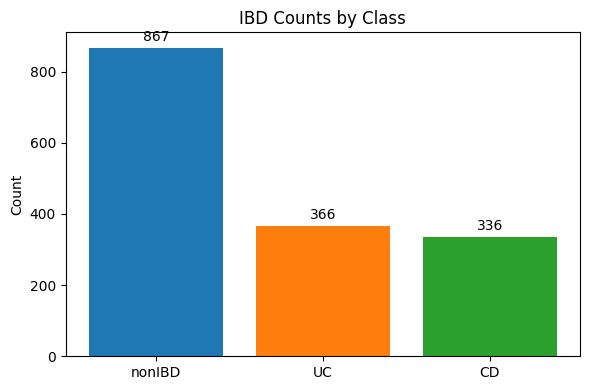

In [2]:

# Data
labels = ['nonIBD', 'UC', 'CD']
counts = [867, 366, 336]

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, counts, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, str(yval), ha='center', va='bottom')

# Aesthetics
plt.ylabel('Count')
plt.title('IBD Counts by Class')
plt.tight_layout()
plt.show()

In [3]:
row_names = ['All Features', 'SelectMicro_0.05', 'SelectMicro_0.1', 'Lasso','SelectMicro_Lasso']
col_names = ['Accuracy', 'F1-Score', 'MCC score','AUC']
tax_names = ['Species','Genus']

In [4]:
binary_select = pd.DataFrame(np.array([
    (283,220),
    (90,69),
    (102,75),
    (157,126),
    (100,69) ]), index=row_names, columns=tax_names )

multi_select = pd.DataFrame(np.array([
    (283,220),
    (110,86),
    (117,92),
    (146,126),
    (114,91) ]), index=row_names, columns=tax_names )

results_select_dict = {'Multiple categories':multi_select,'Binary':binary_select}

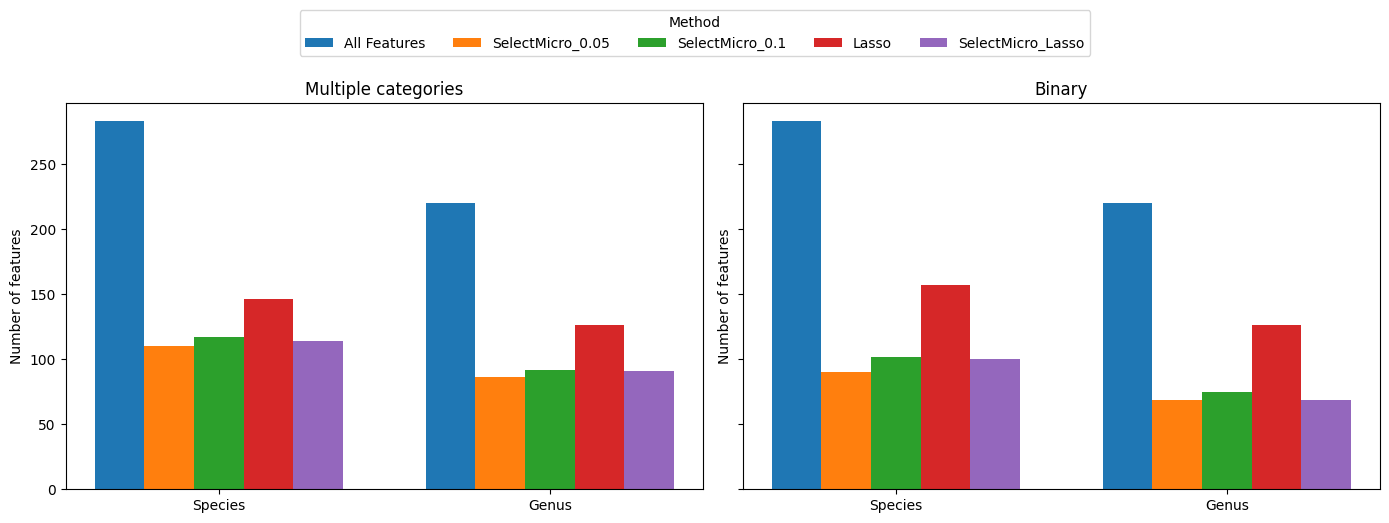

In [5]:
colors = ['#1f77b4',  # Blue
 '#ff7f0e',  # Orange
 '#2ca02c',  # Green
 '#d62728',  # Red
 '#9467bd']  # Purple

# Create subplots: 1 row, len(results_select_dict) columns
fig, axes = plt.subplots(1, len(results_select_dict), figsize=(14, 5), sharey=True)

# If only one subplot, make sure axes is iterable
if len(results_select_dict) == 1:
    axes = [axes]

# Plot each model
for ax, (model_name, df) in zip(axes, results_select_dict.items()):
    x = np.arange(len(tax_names)) 
    bar_width = 0.15

    # Plot each run
    for i, run in enumerate(df.index):
        ax.bar(x + i * bar_width, df.loc[run], width=bar_width, label=run, color=colors[i])

    ax.set_xticks(x + bar_width * 2)
    ax.set_xticklabels(tax_names)
    ax.set_title(f'{model_name}')
    ax.set_ylabel('Number of features')

# Add a single shared legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Method', loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(df.index))

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Make room for legend
plt.show()

In [6]:
# Concatenate side by side (columns), adding keys to distinguish
combined = pd.concat(results_select_dict, axis=1)

# Print the result
print(combined)

                  Multiple categories        Binary      
                              Species Genus Species Genus
All Features                      283   220     283   220
SelectMicro_0.05                  110    86      90    69
SelectMicro_0.1                   117    92     102    75
Lasso                             146   126     157   126
SelectMicro_Lasso                 114    91     100    69


## Multi

### Species

In [7]:
Multi_sp_RF=pd.DataFrame(np.array([
( 0.781 , 0.778 , 0.616 ,   0.908 ),
( 0.764 , 0.763 , 0.590 ,   0.901 ),
( 0.772 , 0.771 , 0.603 ,   0.907 ),
( 0.770 , 0.768 , 0.599 ,   0.903 ),
( 0.766 , 0.764 , 0.591 ,   0.900 )]), index=row_names, columns=col_names
                        )
Multi_sp_XG = pd.DataFrame(np.array([
( 0.755 , 0.754 , 0.574 ,   0.894 ),
( 0.753 , 0.752 , 0.570 ,   0.890 ),
( 0.758 , 0.757 , 0.579 ,   0.896 ),
( 0.760 , 0.759 , 0.582 ,   0.893 ),
( 0.755 , 0.755 , 0.575 ,   0.895 )
]), index=row_names, columns=col_names
                        )

Multi_sp_NB = pd.DataFrame(np.array([
( 0.496 , 0.499 , 0.347 ,   0.752 ),
( 0.530 , 0.539 , 0.384 ,   0.773 ),
( 0.532 , 0.542 , 0.388 ,   0.774 ),
( 0.549 , 0.564 , 0.399 ,   0.771 ),
( 0.538 , 0.548 , 0.390 ,   0.781 )
]), index=row_names, columns=col_names                        )

Multi_sp_SVM = pd.DataFrame(np.array([
( 0.678 , 0.687 , 0.485 ,   0.842 ),
( 0.669 , 0.679 , 0.474 ,   0.839 ),
( 0.669 , 0.680 , 0.476 ,   0.841 ),
( 0.679 , 0.688 , 0.485 ,   0.842 ),
( 0.671 , 0.681 , 0.477 ,   0.842 )
]), index=row_names, columns=col_names
                        )
# Store in dictionary
results_dict_multi_sp = {
    'RF': Multi_sp_RF,
    'XG': Multi_sp_XG,
    'NB': Multi_sp_NB,
    'SVM': Multi_sp_SVM    
}


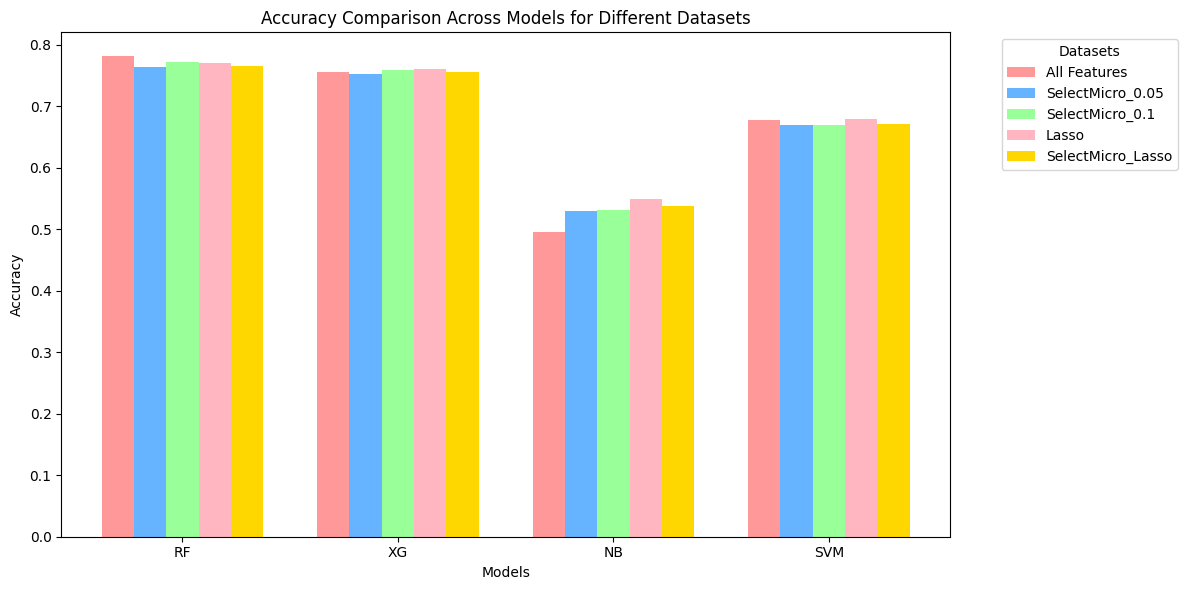

In [8]:
# Step 1: Extract the metric of interest (e.g., 'Precision')
metric = 'Accuracy'
models = list(results_dict_multi_sp.keys())
datasets = row_names
n_models = len(models)
n_datasets = len(datasets)

# Step 2: Prepare data for plotting
# Create a DataFrame where rows are models and columns are datasets
plot_data = pd.DataFrame({
    model: results_dict_multi_sp[model][metric].values
    for model in models
}, index=datasets).T

# Step 3: Plotting
x = np.arange(n_models)  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Colors for the datasets
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFB6C1', '#FFD700']  # Add more colors if needed

# Plot bars for each dataset
for i, dataset in enumerate(datasets):
    ax.bar(x + i * width, plot_data[dataset], width=width, label=dataset, color=colors[i])

# Customize the plot
ax.set_xlabel('Models')
ax.set_ylabel(metric)
ax.set_title(f'{metric} Comparison Across Models for Different Datasets')
ax.set_xticks(x + width * (n_datasets - 1) / 2)
ax.set_xticklabels(models)
ax.legend(title='Datasets', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

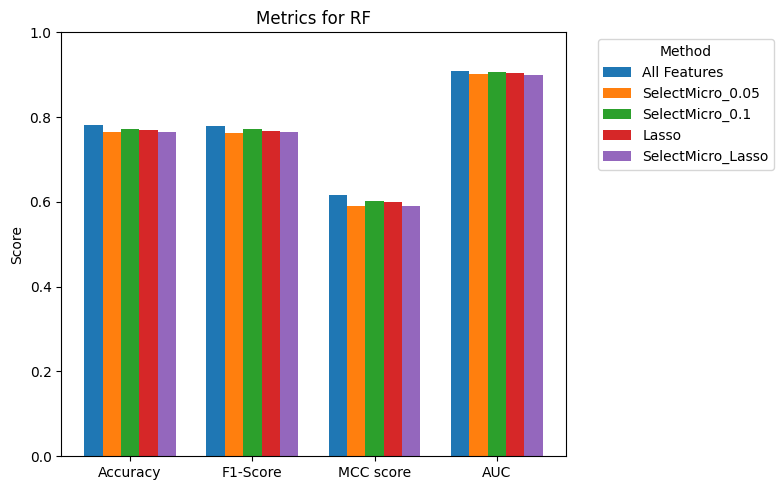

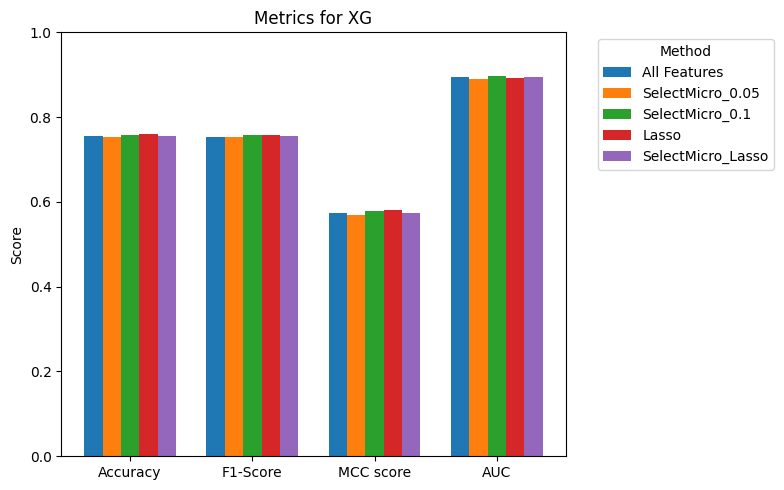

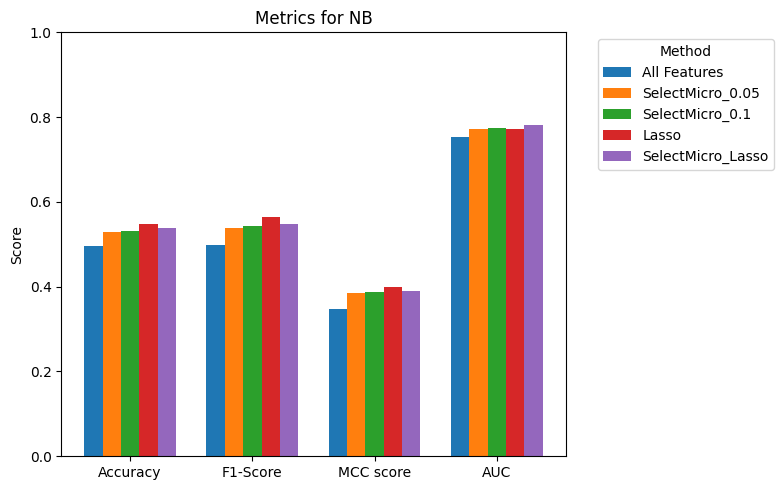

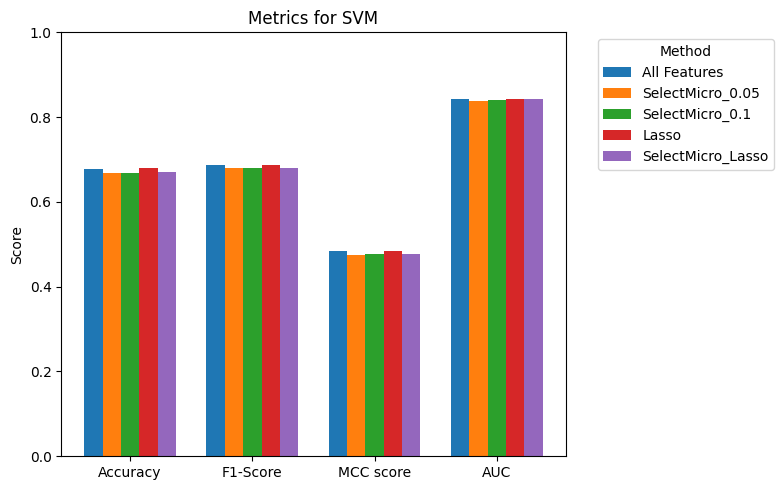

In [9]:
# Colors for different runs
colors = ['#1f77b4',  # Blue
 '#ff7f0e',  # Orange
 '#2ca02c',  # Green
 '#d62728',  # Red
 '#9467bd']  # Purple
# Plot settings
for model_name, df in results_dict_multi_sp.items():
    plt.figure(figsize=(8, 5))
    x = np.arange(len(col_names))  # [0, 1, 2, 3] for the 4 metrics
    bar_width = 0.15

    # Plot each run as a separate bar (grouped by metric)
    for i, run in enumerate(df.index):
        plt.bar(x + i * bar_width, df.loc[run], width=bar_width, label=run, color=colors[i])

    plt.xticks(x + bar_width * 2, col_names)
    plt.title(f'Metrics for {model_name}')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### Genus

In [10]:
Multi_ge_RF=pd.DataFrame(np.array([
 ( 0.765 , 0.764 , 0.593 ,   0.901 ),
( 0.765 , 0.765 , 0.594 ,   0.898 ),
( 0.767 , 0.767 , 0.599 ,   0.897 ),
( 0.769 , 0.769 , 0.602 ,   0.899 ),
( 0.770 , 0.770 , 0.602 ,   0.901 )]), index=row_names, columns=col_names
                        )

Multi_ge_XG = pd.DataFrame(np.array([
( 0.758 , 0.757 , 0.581 ,   0.892 ),
( 0.760 , 0.760 , 0.588 ,   0.897 ),
( 0.751 , 0.752 , 0.571 ,   0.892 ),
( 0.759 , 0.758 , 0.583 ,   0.893 ),
( 0.751 , 0.752 , 0.571 ,   0.892 ),
]), index=row_names, columns=col_names
                        )

Multi_ge_NB = pd.DataFrame(np.array([
( 0.474 , 0.472 , 0.322 ,   0.739 ),
( 0.489 , 0.488 , 0.343 ,   0.754 ),
( 0.490 , 0.490 , 0.344 ,   0.753 ),
( 0.513 , 0.521 , 0.366 ,   0.749 ),
( 0.498 , 0.501 , 0.353 ,   0.754 ),
]), index=row_names, columns=col_names
                        )

Multi_ge_SVM = pd.DataFrame(np.array([
( 0.663 , 0.674 , 0.463 ,   0.833 ),
( 0.658 , 0.669 , 0.453 ,   0.833 ),
( 0.663 , 0.674 , 0.460 ,   0.833 ),
( 0.663 , 0.674 , 0.463 ,   0.833 ),
( 0.663 , 0.674 , 0.460 ,   0.833 ),
]), index=row_names, columns=col_names
                        )

# Store in dictionary
results_dict_multi_ge = {
    'RF': Multi_ge_RF,
    'XG': Multi_ge_XG,
    'NB': Multi_ge_NB,
    'SVM': Multi_ge_SVM    
}

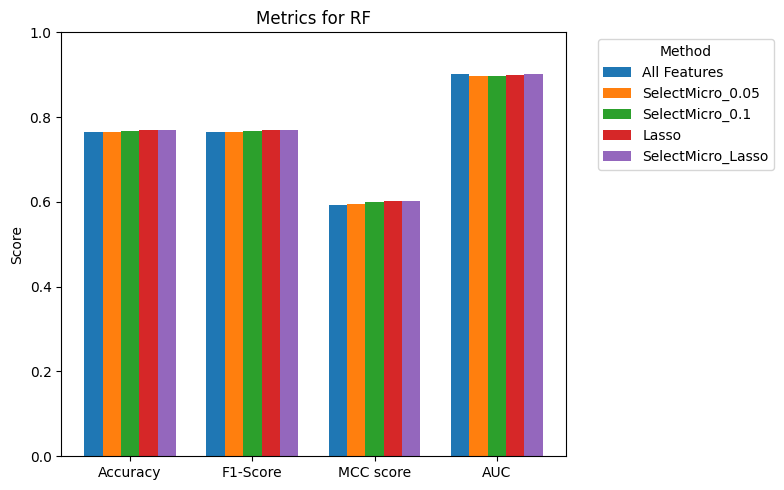

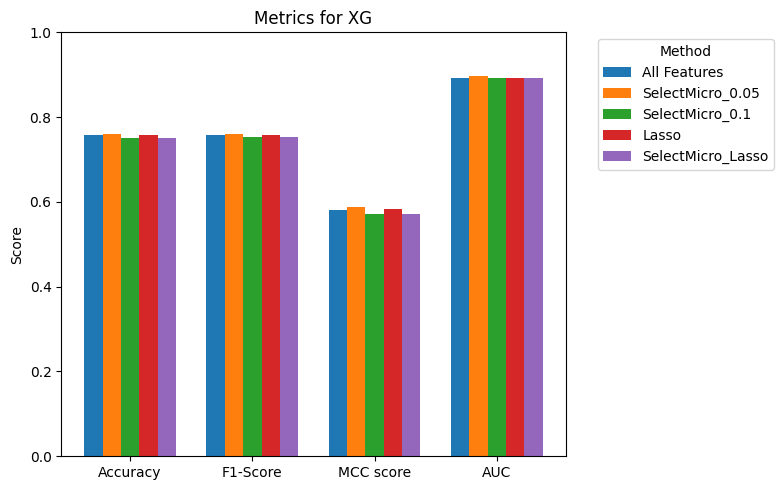

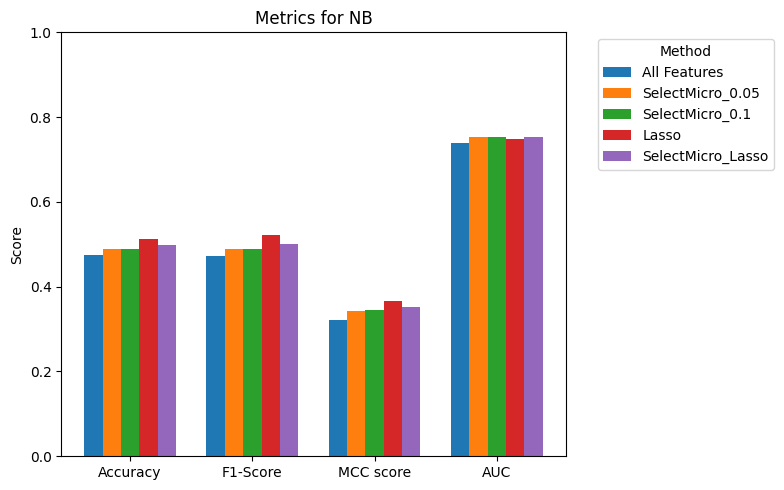

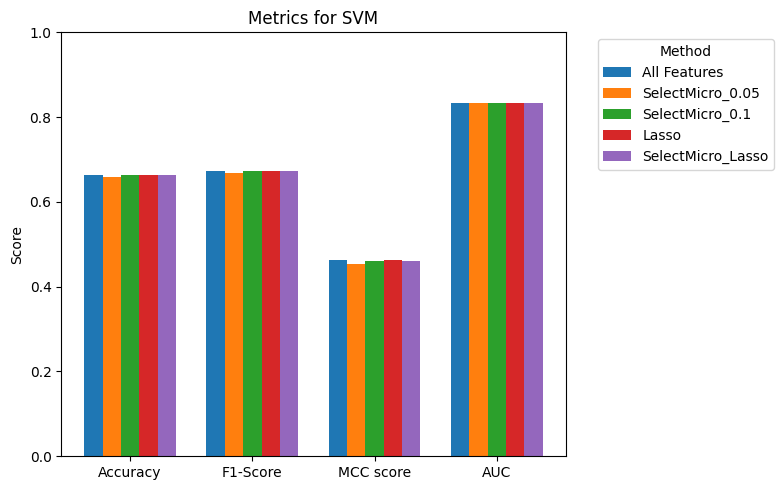

In [11]:
# Colors for different runs
colors = ['#1f77b4',  # Blue
 '#ff7f0e',  # Orange
 '#2ca02c',  # Green
 '#d62728',  # Red
 '#9467bd']  # Purple

# Plot settings
for model_name, df in results_dict_multi_ge.items():
    plt.figure(figsize=(8, 5))
    x = np.arange(len(col_names))  # [0, 1, 2, 3] for the 4 metrics
    bar_width = 0.15

    # Plot each run as a separate bar (grouped by metric)
    for i, run in enumerate(df.index):
        plt.bar(x + i * bar_width, df.loc[run], width=bar_width, label=run, color=colors[i])

    plt.xticks(x + bar_width * 2, col_names)
    plt.title(f'Metrics for {model_name}')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

## Binary

### Species

In [12]:
Bi_sp_RF=pd.DataFrame(np.array([
 ( 0.852 , 0.860 , 0.707 ,   0.932 ),
( 0.844 , 0.855 , 0.687 ,   0.917 ),
( 0.846 , 0.856 , 0.692 ,   0.926 ),
( 0.850 , 0.860 , 0.702 ,   0.932 ),
( 0.843 , 0.854 , 0.687 ,   0.924 )]), index=row_names, columns=col_names
                        )

Bi_sp_XG = pd.DataFrame(np.array([
( 0.839 , 0.850 , 0.678 ,   0.925 ),
( 0.830 , 0.842 , 0.661 ,   0.914 ),
( 0.841 , 0.851 , 0.682 ,   0.920 ),
( 0.843 , 0.854 , 0.688 ,   0.923 ),
( 0.841 , 0.851 , 0.682 ,   0.920 )
]), index=row_names, columns=col_names
                        )

Bi_sp_NB = pd.DataFrame(np.array([
( 0.737 , 0.755 , 0.495 ,   0.835 ),
( 0.662 , 0.574 , 0.445 ,   0.861 ),
( 0.681 , 0.614 , 0.462 ,   0.861 ),
( 0.679 , 0.769 , 0.392 ,   0.656 ),
( 0.740 , 0.724 , 0.521 ,   0.861 )
]), index=row_names, columns=col_names
                        )

Bi_sp_SVM = pd.DataFrame(np.array([
( 0.792 , 0.807 , 0.583 ,   0.873 ),
( 0.784 , 0.802 , 0.565 ,   0.866 ),
( 0.784 , 0.798 , 0.569 ,   0.872 ),
( 0.794 , 0.809 , 0.586 ,   0.874 ),
( 0.784 , 0.798 , 0.569 ,   0.873 )
]), index=row_names, columns=col_names
                        )

# Store in dictionary
results_dict_bi_sp = {
    'RF': Bi_sp_RF,
    'XG': Bi_sp_XG,
    'NB': Bi_sp_NB,
    'SVM': Bi_sp_SVM    
}


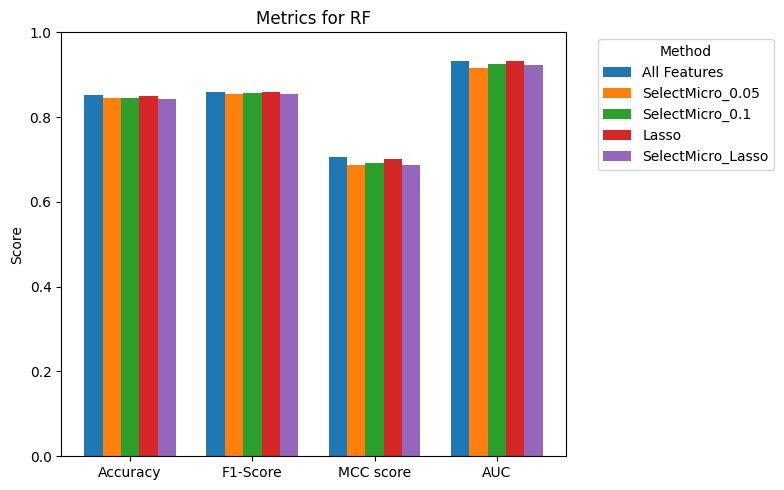

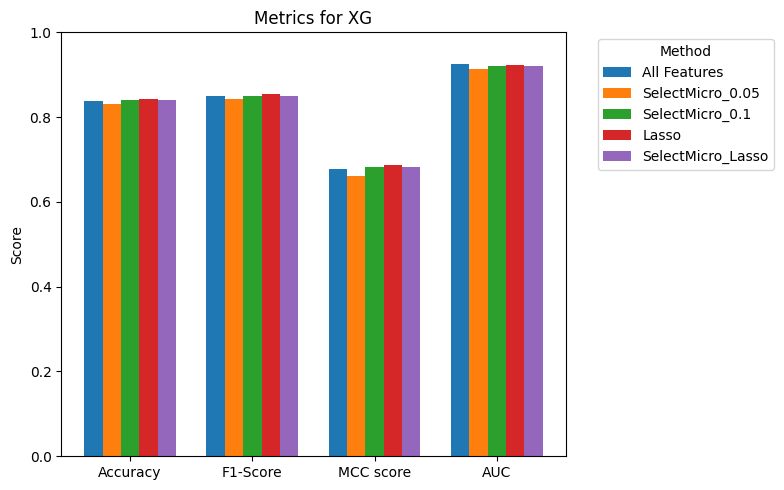

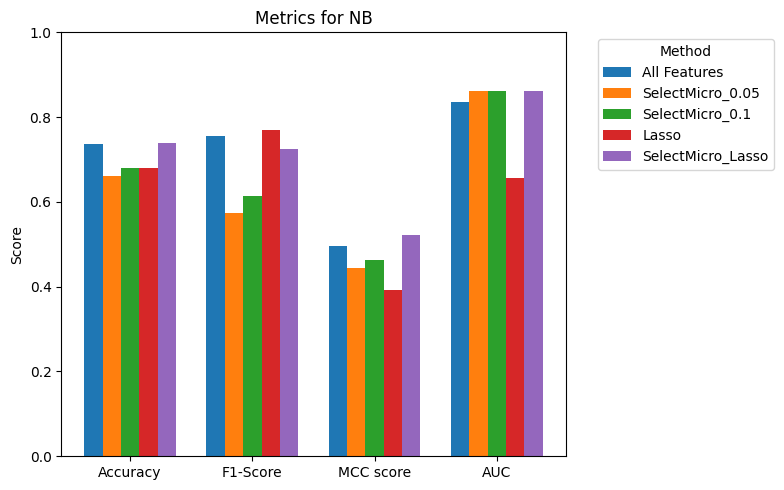

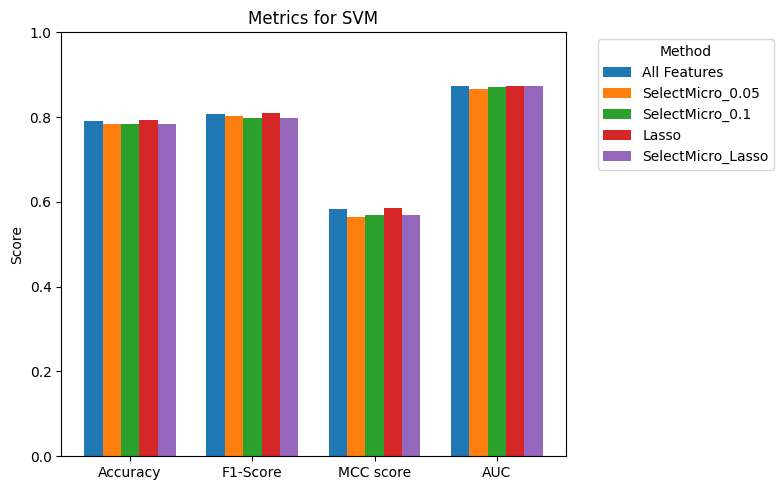

In [13]:
# Colors for different runs
colors = ['#1f77b4',  # Blue
 '#ff7f0e',  # Orange
 '#2ca02c',  # Green
 '#d62728',  # Red
 '#9467bd']  # Purple

# Plot settings
for model_name, df in results_dict_bi_sp.items():
    plt.figure(figsize=(8, 5))
    x = np.arange(len(col_names))  # [0, 1, 2, 3] for the 4 metrics
    bar_width = 0.15

    # Plot each run as a separate bar (grouped by metric)
    for i, run in enumerate(df.index):
        plt.bar(x + i * bar_width, df.loc[run], width=bar_width, label=run, color=colors[i])

    plt.xticks(x + bar_width * 2, col_names)
    plt.title(f'Metrics for {model_name}')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### Genus

In [14]:
Bi_ge_RF=pd.DataFrame(np.array([
( 0.851 , 0.860 , 0.705 ,   0.928 ),
( 0.831 , 0.843 , 0.662 ,   0.917 ),
( 0.842 , 0.852 , 0.685 ,   0.916 ),
( 0.837 , 0.847 , 0.675 ,   0.922 ),
( 0.835 , 0.848 , 0.668 ,   0.915 )]), index=row_names, columns=col_names
                        )

Bi_ge_XG = pd.DataFrame(np.array([
( 0.839 , 0.851 , 0.679 ,   0.918 ),
( 0.825 , 0.839 , 0.649 ,   0.910 ),
( 0.824 , 0.838 , 0.647 ,   0.911 ),
( 0.841 , 0.853 , 0.683 ,   0.916 ),
( 0.829 , 0.842 , 0.656 ,   0.911 )
]), index=row_names, columns=col_names
                        )

Bi_ge_NB = pd.DataFrame(np.array([
( 0.703 , 0.773 , 0.417 ,   0.775 ),
( 0.640 , 0.532 , 0.412 ,   0.846 ),
( 0.644 , 0.539 , 0.418 ,   0.851 ),
( 0.639 , 0.750 , 0.313 ,   0.613 ),
( 0.697 , 0.648 , 0.474 ,   0.851 )
]), index=row_names, columns=col_names
                        )

Bi_ge_SVM = pd.DataFrame(np.array([
( 0.778 , 0.796 , 0.554 ,   0.867 ),
( 0.781 , 0.798 , 0.560 ,   0.864 ),
( 0.782 , 0.799 , 0.562 ,   0.864 ),
( 0.779 , 0.797 , 0.555 ,   0.868 ),
( 0.779 , 0.798 , 0.556 ,   0.862 )
]), index=row_names, columns=col_names
                        )

# Store in dictionary
results_dict_bi_ge = {
    'RF': Bi_ge_RF,
    'XG': Bi_ge_XG,
    'NB': Bi_ge_NB,
    'SVM': Bi_ge_SVM    
}

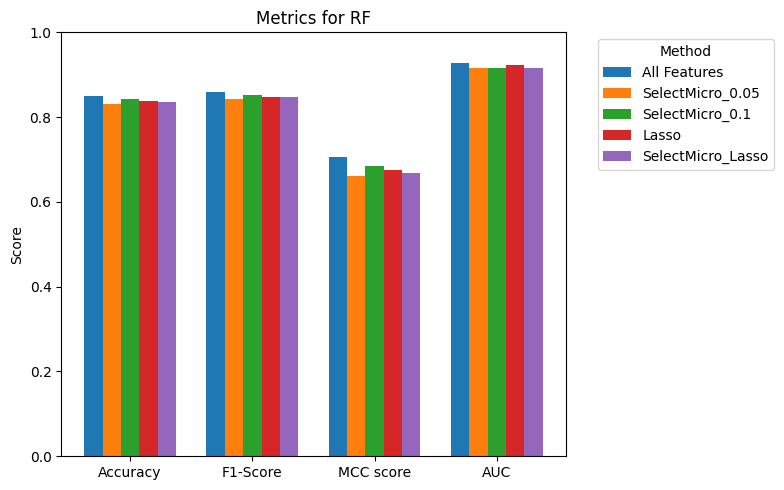

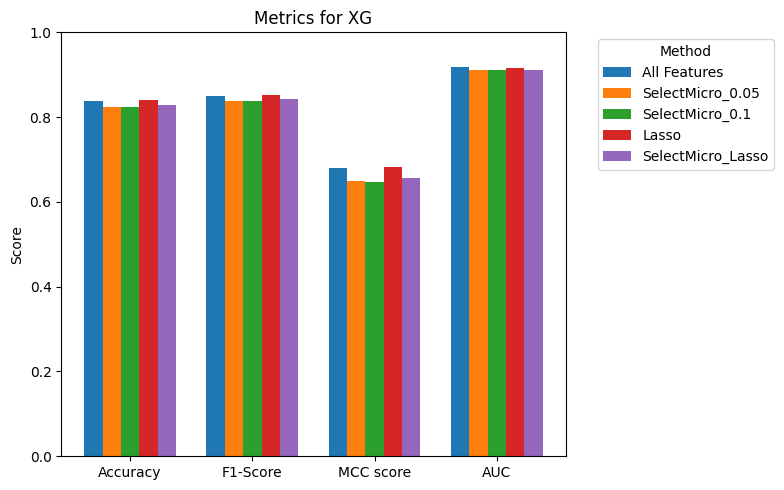

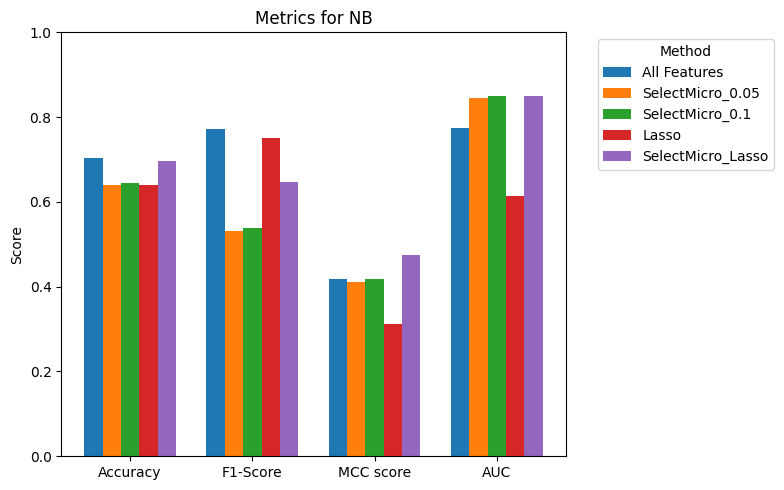

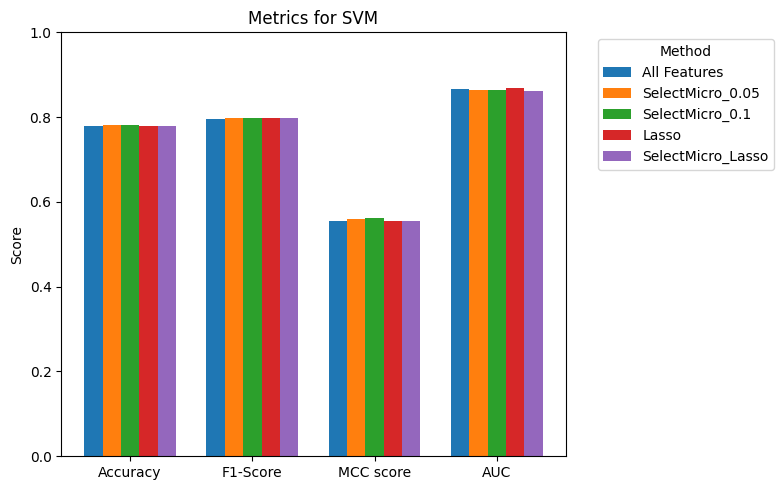

In [15]:
# Colors for different runs
colors = ['#1f77b4',  # Blue
 '#ff7f0e',  # Orange
 '#2ca02c',  # Green
 '#d62728',  # Red
 '#9467bd']  # Purple

# Plot settings
for model_name, df in results_dict_bi_ge.items():
    plt.figure(figsize=(8, 5))
    x = np.arange(len(col_names))  # [0, 1, 2, 3] for the 4 metrics
    bar_width = 0.15

    # Plot each run as a separate bar (grouped by metric)
    for i, run in enumerate(df.index):
        plt.bar(x + i * bar_width, df.loc[run], width=bar_width, label=run, color=colors[i])

    plt.xticks(x + bar_width * 2, col_names)
    plt.title(f'Metrics for {model_name}')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

## Part 2
results from one dataset db1629, for 3 categories and binary classification, the result is from 